In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import MinMaxScaler
from scipy import stats



In [4]:
# Load the Titanic dataset from seaborn
df = sns.load_dataset('titanic') #sns = seaborn
df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [6]:
df.isnull().sum()   #calculate the missing values and printing the columns

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


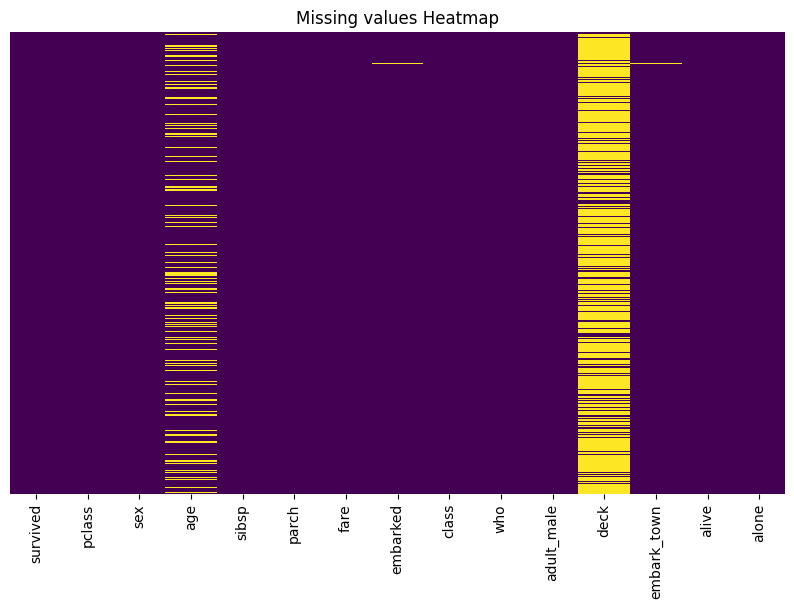

In [11]:
#visualise it in a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap = 'viridis', cbar = False, yticklabels = False)
plt.title("Missing values Heatmap")
plt.show()

In [12]:
#MAR =  age, embarked , embarked_town
#MANR = deck
#MCAR =
#deck is missing more than 70% so drop the column

In [13]:
#Handle Missing Data
df['age'] = df['age'].fillna(df['age'].mean())


In [25]:
print(df['deck'].mode())

0    C
Name: deck, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [24]:
df['deck'] = df['deck'].fillna(df['deck'].mode()[0])

 # 0 index is most used so we are re-placing others with that same value / most frequent value

In [22]:
df['deck'].fillna(df['deck'].mode())

,deck
0,C
1,C
2,C
3,C
4,C
...,...
886,C
887,B
888,C
889,C


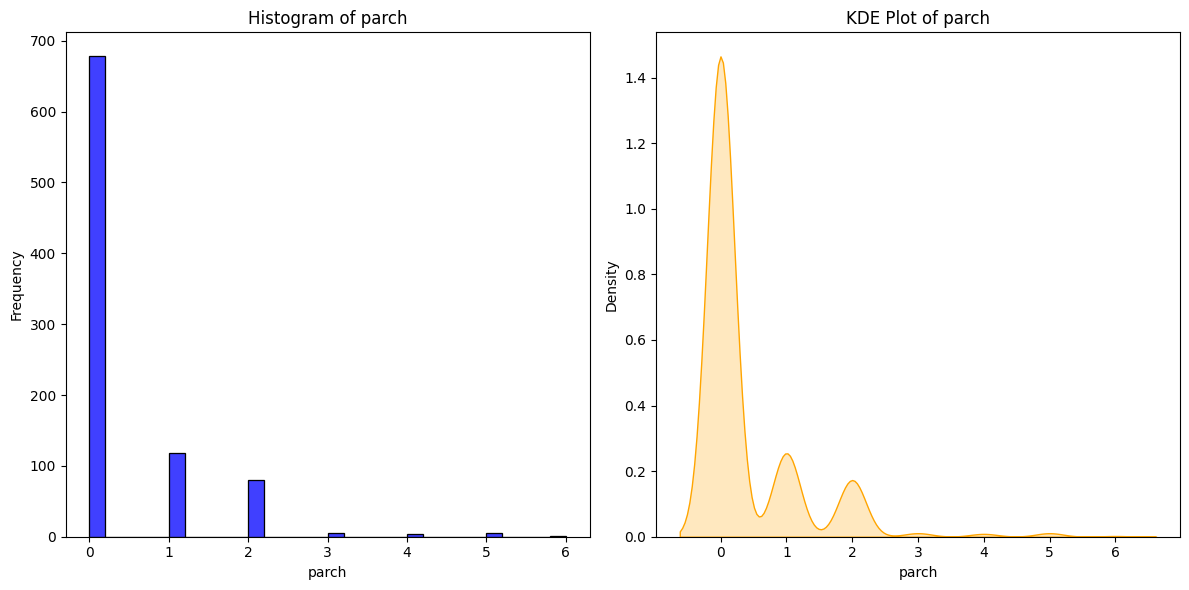

In [21]:
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1) #sub plot has 3 values 1 row 2 column last 1 is the position
sns.histplot(df['parch'], bins=30, kde=False, color='blue', edgecolor='black')
plt.title('Histogram of parch')
plt.xlabel('parch')
plt.ylabel('Frequency')

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(df['parch'], fill=True, color='orange')
plt.title('KDE Plot of parch')
plt.xlabel('parch')
plt.ylabel('Density')

plt.tight_layout()
plt.show() #to understand what kind of distribution it has


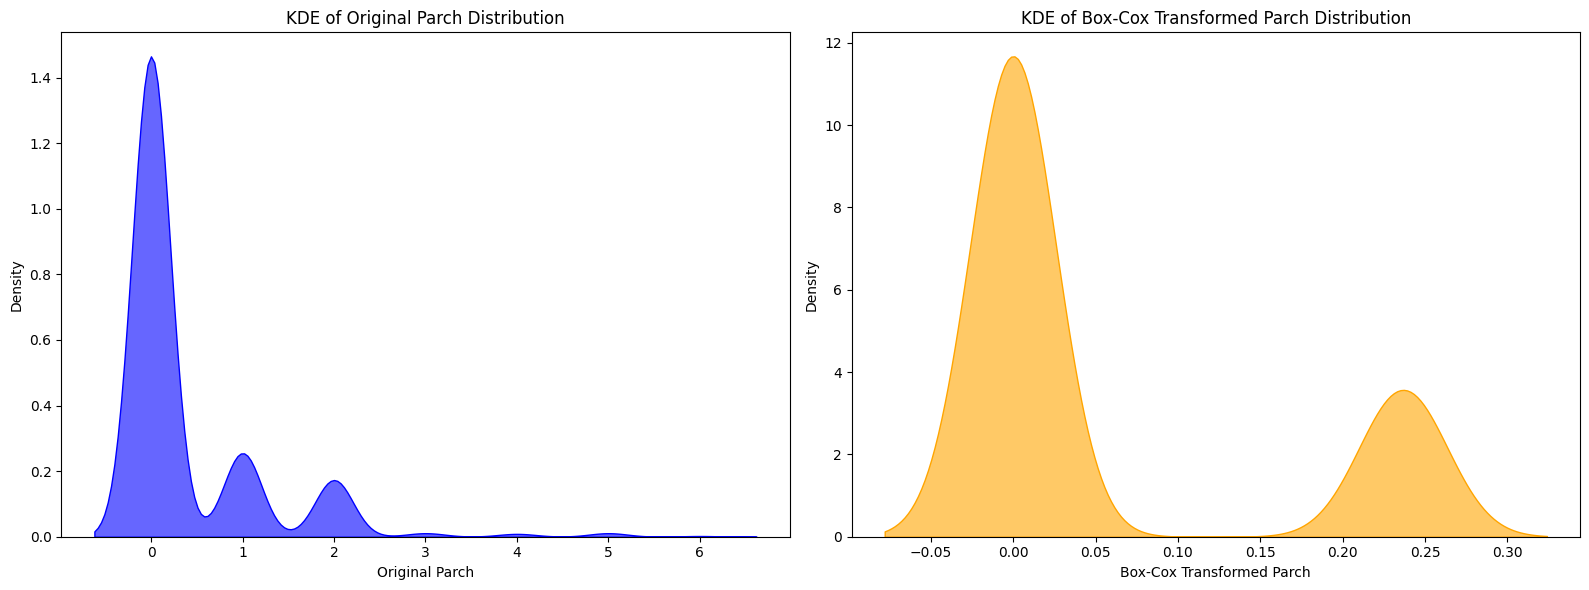

In [27]:
# from scipy import stats # incase you haven’t installed stats before
# Apply Box-Cox Transformation
# Box-Cox requires positive data, so we ensure 'parch' is > 0
# Since 'parch' is count data, we add a small constant
df['parch_shifted'] = df['parch'] + 1  # Shift by 1 to avoid zeros
df['parch_boxcox'], _ = stats.boxcox(df['parch_shifted'])

# Step 3: Visualize the distributions using KDE
plt.figure(figsize=(16, 6))

# KDE plot for original parch
plt.subplot(1, 2, 1)
sns.kdeplot(df['parch'], fill=True, color='blue', alpha=0.6)
plt.title('KDE of Original Parch Distribution')
plt.xlabel('Original Parch')
plt.ylabel('Density')

# KDE plot for Box-Cox transformed parch
plt.subplot(1, 2, 2)
sns.kdeplot(df['parch_boxcox'], fill=True, color='orange', alpha=0.6)  #after stand
plt.title('KDE of Box-Cox Transformed Parch Distribution')
plt.xlabel('Box-Cox Transformed Parch')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


In [28]:
#Data Normalization (Scaling Numeric Data)
scaler = MinMaxScaler()

# Apply Min-Max Scaling to 'age' and 'fare'
df[['age_scaled', 'fare_scaled']] = scaler.fit_transform(df[['age', 'fare']])


In [29]:
df[['age_scaled', 'fare_scaled']]

,age_scaled,fare_scaled
0,0.271174,0.014151
1,0.472229,0.139136
2,0.321438,0.015469
3,0.434531,0.103644
4,0.434531,0.015713
...,...,...
886,0.334004,0.025374
887,0.233476,0.058556
888,0.367921,0.045771
889,0.321438,0.058556


In [30]:
#Data Enrichment
df['family_size'] = df['sibsp'] + df['parch'] + 1 # Including the passenger themselves